<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [2]:
df = pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [30]:
df.shape

(1000, 11)

#### Columns

In [31]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [32]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [4]:
df.fillna('Unknown', inplace=True)

In [5]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [35]:
categorical_columns = [ 'Unnamed: 0','Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose','Risk']
for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Unnamed: 0': [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

##### Create a New column Id by replacing unnamed column

In [6]:
df['Id'] = df.iloc[:, 0]
df = df.drop(df.columns[0], axis=1)
df = df[['Id'] + [col for col in df.columns if col != 'Id']]

In [37]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [39]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [41]:
grouped_counts = df.groupby(['Sex','Risk'])['Purpose'].value_counts()
grouped_counts

Sex  Risk  Purpose            
0    bad   car                     66
           radio/TV                43
           furniture/equipment     30
           business                27
           education               14
           repairs                  6
           vacation/others          3
           domestic appliances      2
     good  car                    177
           radio/TV               152
           furniture/equipment     77
           business                51
           education               21
           repairs                 11
           vacation/others          6
           domestic appliances      4
1    bad   car                     40
           furniture/equipment     28
           radio/TV                19
           education                9
           business                 7
           domestic appliances      2
           repairs                  2
           vacation/others          2
     good  radio/TV                66
           car     

In [42]:
grouped_counts = df.groupby(['Purpose','Risk'])['Sex'].value_counts()
grouped_counts

Purpose              Risk  Sex
business             bad   0       27
                           1        7
                     good  0       51
                           1       12
car                  bad   0       66
                           1       40
                     good  0      177
                           1       54
domestic appliances  bad   0        2
                           1        2
                     good  1        4
                           0        4
education            bad   0       14
                           1        9
                     good  0       21
                           1       15
furniture/equipment  bad   0       30
                           1       28
                     good  0       77
                           1       46
radio/TV             bad   0       43
                           1       19
                     good  0      152
                           1       66
repairs              bad   0        6
                   

In [40]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

<Axes: xlabel='Risk', ylabel='count'>

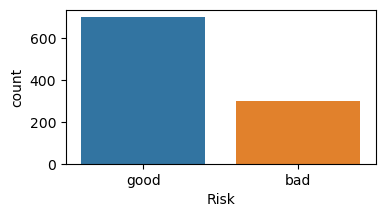

In [43]:
plt.figure(figsize=(4, 2)) 
sns.countplot(x='Risk',data=df)

Text(0, 0.5, 'Total number of credit holders')

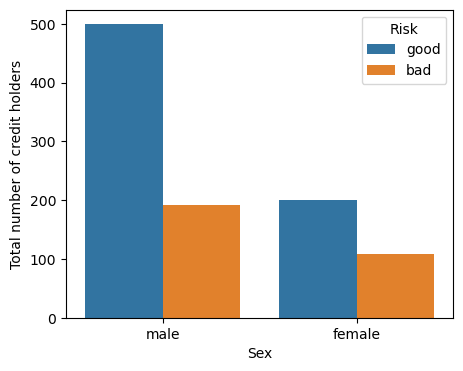

In [7]:
plt.figure(figsize=(5, 4)) 
sns.countplot(x='Sex',hue ='Risk',data=df)
plt.ylabel('Total number of credit holders')

Text(0, 0.5, 'Total number of credit holders')

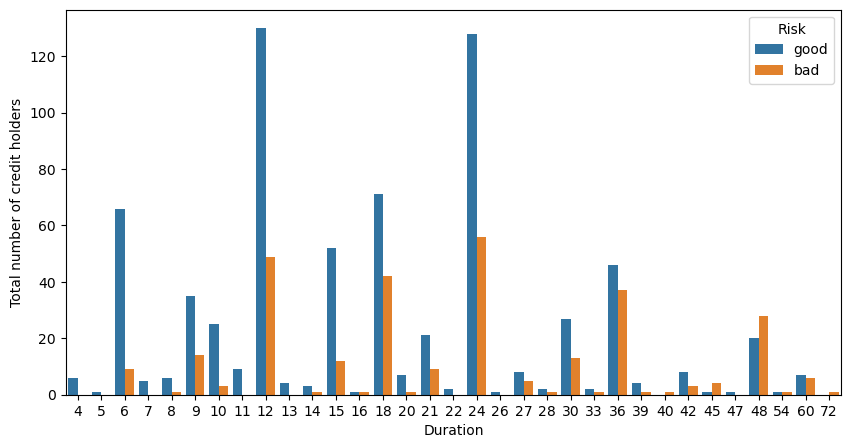

In [44]:
plt.figure(figsize=(10, 5)) 
sns.countplot(x='Duration',hue ='Risk',data=df)
plt.ylabel('Total number of credit holders')

In [40]:
df['Job'] = df['Job'].astype(str)

Text(0, 0.5, 'Total number of credit holders')

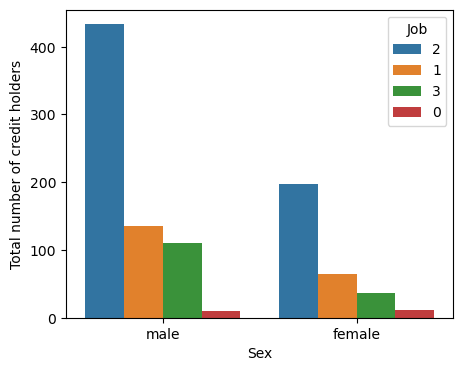

In [41]:
plt.figure(figsize=(5, 4)) 
sns.countplot(x='Sex',hue ='Job',data=df)
plt.ylabel('Total number of credit holders')

Text(0, 0.5, 'Total number of credit holders')

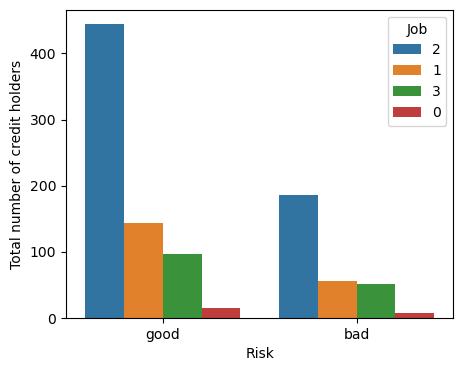

In [42]:
plt.figure(figsize=(5, 4)) 
sns.countplot(x='Risk',hue ='Job',data=df)
plt.ylabel('Total number of credit holders')

Text(0, 0.5, 'Total number of credit holders')

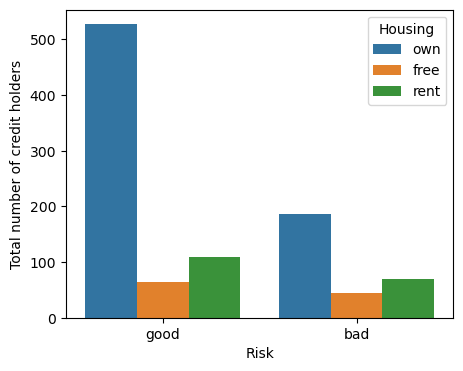

In [43]:
plt.figure(figsize=(5, 4)) 
sns.countplot(x='Risk',hue ='Housing',data=df)
plt.ylabel('Total number of credit holders')

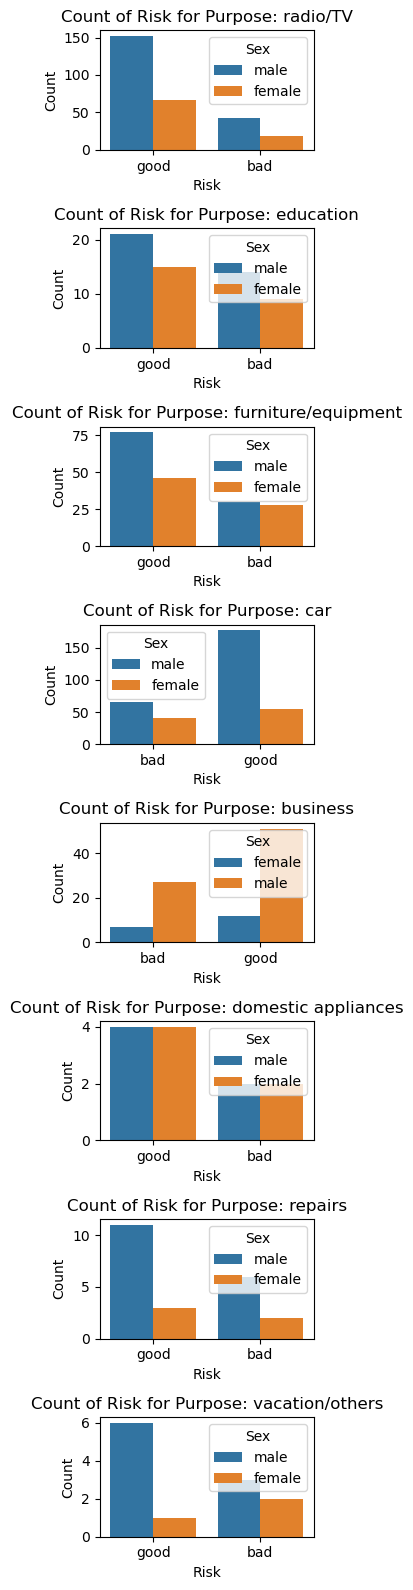

In [8]:
purposes = df['Purpose'].unique()
fig, axes = plt.subplots(nrows=len(purposes), ncols=1, figsize=(3,2 * len(purposes)))

for ax, purpose in zip(axes, purposes):
    purpose_data = df[df['Purpose'] == purpose]
    sns.countplot(x='Risk',hue='Sex', data=purpose_data, ax=ax)
    ax.set_title(f'Count of Risk for Purpose: {purpose}')
    ax.set_ylabel('Count')
    ax.set_xlabel('Risk')

plt.tight_layout()

C:\Users\fmksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fmksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fmksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fmksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

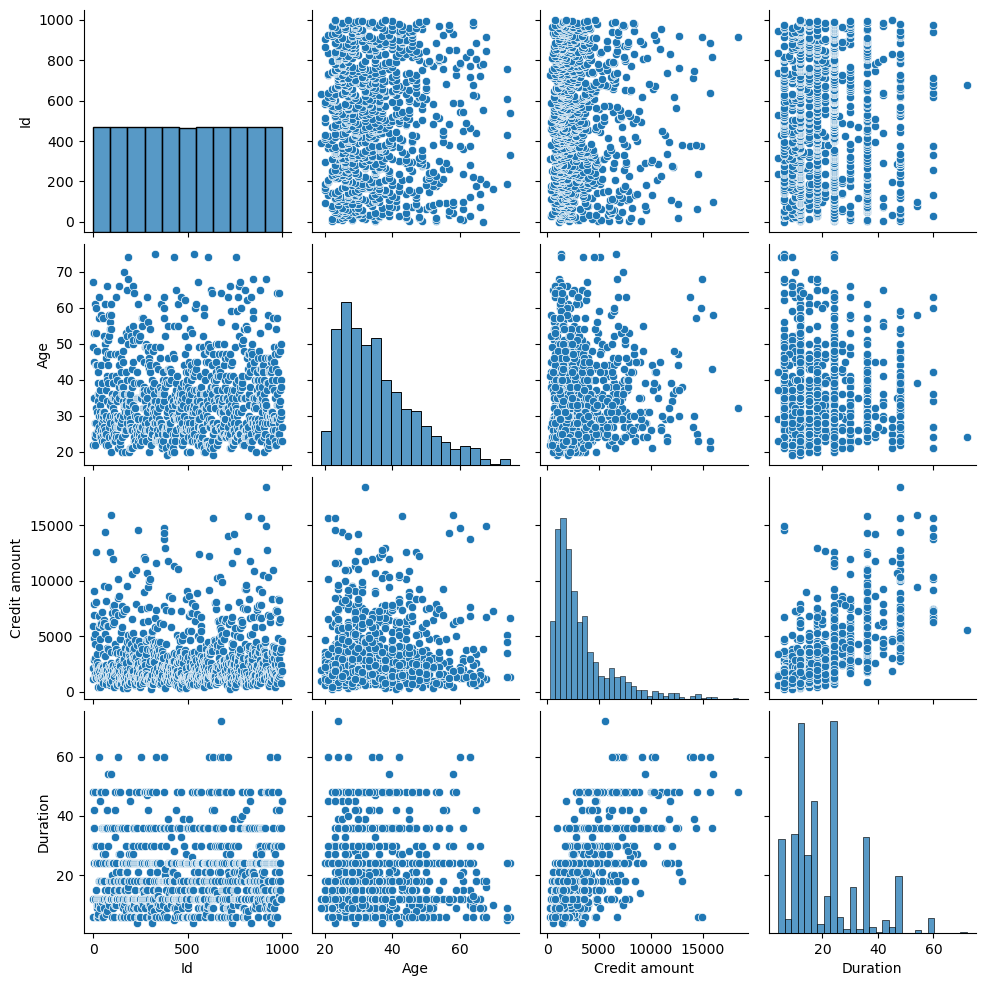

In [44]:
sns.pairplot(df)

<Axes: xlabel='Risk', ylabel='count'>

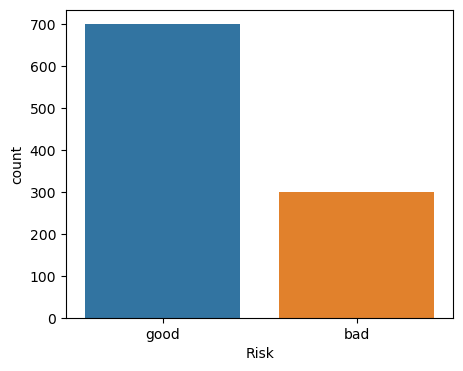

In [45]:
plt.figure(figsize=(5, 4)) 
sns.countplot(x='Risk',data = df)

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [ ]:
dummies=pd.get_dummies(df['Purpose'], prefix='Purpose', drop_first=True).astype(int)
newdf = pd.concat([df, dummies], axis=1)
newdf

#### Use label encoding for rest of the categorical data

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
newdf['Sex'] = le.fit_transform(newdf['Sex'])
newdf['Housing'] = le.fit_transform(newdf['Housing'])
newdf['Saving accounts'] = le.fit_transform(newdf['Saving accounts'])
newdf['Checking account'] = le.fit_transform(newdf['Checking account'])
newdf['Risk'] = le.fit_transform(newdf['Risk'])


In [15]:
newdf.drop(columns = ['Purpose'],inplace = True)
newdf.drop(columns = ['Id','Job'],inplace = True)

In [16]:
newdf.drop(columns = ['Housing'],inplace = True)

In [17]:
newdf['Risk'] = newdf['Risk'].replace({'Good': 0, 'Bad': 1})
newdf

,Age,Sex,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,0,0,1,1169,6,1,0,0,0,0,1,0,0
1,22,1,1,2,5951,48,0,0,0,0,0,1,0,0
2,49,0,1,0,2096,12,1,0,0,1,0,0,0,0
3,45,0,1,1,7882,42,1,0,0,0,1,0,0,0
4,53,0,1,1,4870,24,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1,0,1736,12,1,0,0,0,1,0,0,0
996,40,0,1,1,3857,30,1,1,0,0,0,0,0,0
997,38,0,1,0,804,12,1,0,0,0,0,1,0,0
998,23,0,1,1,1845,45,0,0,0,0,0,1,0,0


In [18]:
newdf['Risk'].unique()

array([1, 0])

In [19]:
newdf.head(1)

,Age,Sex,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,0,0,1,1169,6,1,0,0,0,0,1,0,0


### Check the unique values in the new dataframe

In [29]:
for i in newdf:
    print(f"Number of unique elements in'{i}' :{newdf[i].nunique()}")

Number of unique elements in'Housing' :3
Number of unique elements in'Saving accounts' :5
Number of unique elements in'Checking account' :4
Number of unique elements in'Credit amount' :921
Number of unique elements in'Duration' :33
Number of unique elements in'Risk' :2
Number of unique elements in'Purpose_car' :2
Number of unique elements in'Purpose_domestic appliances' :2
Number of unique elements in'Purpose_education' :2
Number of unique elements in'Purpose_furniture/equipment' :2
Number of unique elements in'Purpose_radio/TV' :2
Number of unique elements in'Purpose_repairs' :2
Number of unique elements in'Purpose_vacation/others' :2


### Plot heatmap

<Axes: >

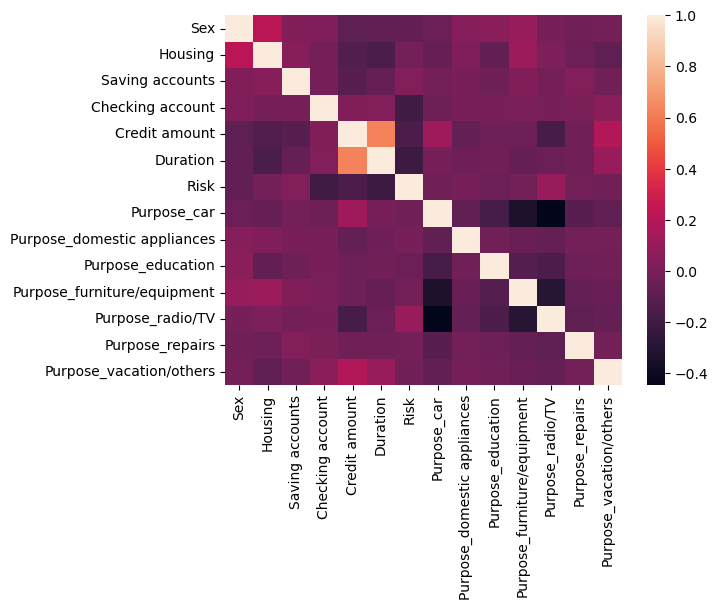

In [18]:
sns.heatmap(newdf.corr())

## Select the Dependent(target) and Independent Variables:

In [119]:
X = newdf.drop(columns = ['Risk'])
y = newdf['Risk']

# Standardize the data

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()

In [122]:
xcolumns = X.columns

In [123]:
X = scaler.fit_transform(X)

In [124]:
X = pd.DataFrame(X, columns = xcolumns)

In [125]:
X.head()

,Age,Sex,Saving accounts,Checking account,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,-0.670280,-1.231393,-0.001045,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,1.491914,-0.196609,1.044372,0.949817,2.248194,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,-0.670280,-0.196609,-1.046463,-0.416562,-0.738668,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,-0.670280,-0.196609,-0.001045,1.634247,1.750384,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,-0.670280,-0.196609,-0.001045,0.566664,0.256953,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


# Split the data into training and testing set

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 100)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [29]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [30]:
params_grid = {'max_depth':[5, 10],'n_estimators':[50, 100],'random_state':[ 20, 42],'n_jobs':[1,2]}
gsv = GridSearchCV(RandomForestClassifier(),params_grid,cv =5,scoring = 'accuracy')
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [50, 100],
                         'n_jobs': [1, 2], 'random_state': [20, 42]},
             scoring='accuracy')

In [31]:
print("Best Estimator:", gsv.best_estimator_)
print("Best Parameters:", gsv.best_params_)
print("Best Score:", gsv.best_score_)

Best Estimator: RandomForestClassifier(max_depth=10, n_jobs=1, random_state=42)
Best Parameters: {'max_depth': 10, 'n_estimators': 100, 'n_jobs': 1, 'random_state': 42}
Best Score: 0.7506666666666667


In [32]:
model = RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=1, random_state=42)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [33]:
y_pred = model.predict(X_test)
print(f"Accuracy score of our model is:{metrics.accuracy_score(y_test,y_pred)}")

print(f"Confusion matrix is:{metrics.confusion_matrix(y_test,y_pred)}")

print(f"Classsification report is:{metrics.classification_report(y_test,y_pred)}")

print(f"Mean of cross validation score is: {cross_val_score(RandomForestClassifier(),X,y,cv=3).mean()}")

Accuracy score of our model is:0.74
Confusion matrix is:[[ 25  46]
 [ 19 160]]
Classsification report is:              precision    recall  f1-score   support

           0       0.57      0.35      0.43        71
           1       0.78      0.89      0.83       179

    accuracy                           0.74       250
   macro avg       0.67      0.62      0.63       250
weighted avg       0.72      0.74      0.72       250

Mean of cross validation score is: 0.7270084455713198


#### Visualize the confusion matrix

<Axes: >

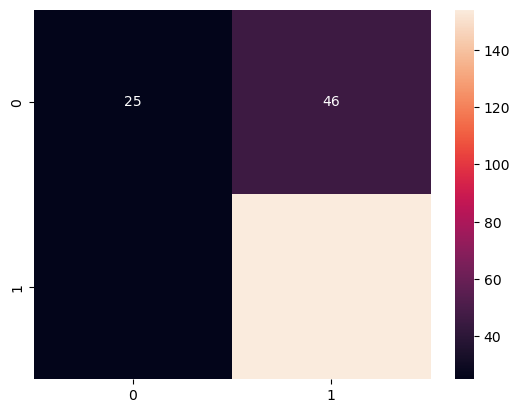

In [37]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

## SupportVectorClassifier:

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = [  {'C': [0.75, 0.85], 'kernel': ['linear', 'poly'], 'degree': [4, 5]} ]
gsv = GridSearchCV(estimator=SVC(),param_grid= param_grid,scoring='accuracy')
gsv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.75, 0.85], 'degree': [4, 5],
                          'kernel': ['linear', 'poly']}],
             scoring='accuracy')

In [40]:
print("Best Estimator:", gsv.best_estimator_)
print("Best Parameters:", gsv.best_params_)
print("Best Score:", gsv.best_score_)

Best Estimator: SVC(C=0.75, degree=4, kernel='poly')
Best Parameters: {'C': 0.75, 'degree': 4, 'kernel': 'poly'}
Best Score: 0.7053333333333334


In [41]:
y_pred = model.predict(X_test)
print(f"Accuracy score of our model is:{metrics.accuracy_score(y_test,y_pred)}")

print(f"Confusion matrix is:{metrics.confusion_matrix(y_test,y_pred)}")

print(f"Classsification report is:{metrics.classification_report(y_test,y_pred)}")

print(f"Mean of cross validation score is: {cross_val_score(SVC(),X,y,cv=3).mean()}")

Accuracy score of our model is:0.716
Confusion matrix is:[[ 25  46]
 [ 25 154]]
Classsification report is:              precision    recall  f1-score   support

           0       0.50      0.35      0.41        71
           1       0.77      0.86      0.81       179

    accuracy                           0.72       250
   macro avg       0.64      0.61      0.61       250
weighted avg       0.69      0.72      0.70       250

Mean of cross validation score is: 0.7089964215712717


## LogisticRegression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [129]:
y_pred = model.predict(X_test)
print(f"Accuracy score of our model is:{metrics.accuracy_score(y_test,y_pred)}")

print(f"Confusion matrix is:{metrics.confusion_matrix(y_test,y_pred)}")

print(f"Classsification report is:{metrics.classification_report(y_test,y_pred)}")

print(f"Mean of cross validation score is: {cross_val_score(LogisticRegression(),X,y,cv=3).mean()}")

Accuracy score of our model is:0.696
Confusion matrix is:[[  9  62]
 [ 14 165]]
Classsification report is:              precision    recall  f1-score   support

           0       0.39      0.13      0.19        71
           1       0.73      0.92      0.81       179

    accuracy                           0.70       250
   macro avg       0.56      0.52      0.50       250
weighted avg       0.63      0.70      0.64       250

Mean of cross validation score is: 0.7029994065922209


## AdaBoost: Classifier

In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
param_grid = {'n_estimators': [50, 100], 
    'learning_rate': [0.01, 0.1]}

gsv = GridSearchCV(estimator=AdaBoostClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy')
gsv.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [69]:
y_pred = model.predict(X_test)
print(f"Accuracy score of our model is:{metrics.accuracy_score(y_test,y_pred)}")

print(f"Confusion matrix is:{metrics.confusion_matrix(y_test,y_pred)}")

print(f"Classsification report is:{metrics.classification_report(y_test,y_pred)}")

print(f"Mean of cross validation score is: {cross_val_score(AdaBoostClassifier(),X,y,cv=3).mean()}")



Accuracy score of our model is:0.7
Confusion matrix is:[[  9  62]
 [ 13 166]]
Classsification report is:              precision    recall  f1-score   support

           0       0.41      0.13      0.19        71
           1       0.73      0.93      0.82       179

    accuracy                           0.70       250
   macro avg       0.57      0.53      0.50       250
weighted avg       0.64      0.70      0.64       250

Mean of cross validation score is: 0.7510054965144786


#### View scores of the different models 

In [ ]:
models = { 'Logistic Regression': LogisticRegression(),'Random Forest': RandomForestClassifier(),'SVC': SVC(),'AdaBoost': AdaBoostClassifier()}
scores_list = []

for model_name, model in models.items():
    mean_score = cross_val_score(model, X, y, cv=3).mean()
    scores_list.append({'Model': model_name,'Mean Score': mean_score})
scores_df = pd.DataFrame(scores_list)
scores_df

## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 5)
pca_data= pd.DataFrame(pca.fit_transform(X_train))
pca_data.head()

,0,1,2,3,4
0,-0.729991,0.502178,-1.360805,-0.036319,-0.079146
1,1.015782,1.871183,-1.269304,-1.236872,1.198352
2,-0.371493,-2.098834,-0.210485,0.170170,-0.054518
3,1.908522,-1.175511,-0.148827,-0.147612,-0.165275
4,-1.041002,1.184556,2.060173,0.228217,-1.415813


In [102]:
pca.n_components_

5

In [103]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca.transform(X_train)
test_X = pca.transform(X_test)

In [104]:
pd.DataFrame(train_X).head()

,0,1,2,3,4
0,-0.729991,0.502178,-1.360805,-0.036319,-0.079146
1,1.015782,1.871183,-1.269304,-1.236872,1.198352
2,-0.371493,-2.098834,-0.210485,0.170170,-0.054518
3,1.908522,-1.175511,-0.148827,-0.147612,-0.165275
4,-1.041002,1.184556,2.060173,0.228217,-1.415813


In [105]:
pd.DataFrame(test_X).head()

,0,1,2,3,4
0,-1.646008,1.185177,-0.720198,-1.343458,-0.690655
1,-0.162489,1.024188,-1.425866,-0.582526,-0.169137
2,-0.541527,1.279158,2.035127,0.232121,0.027607
3,-0.935578,1.468244,2.071334,-0.183324,-0.364172
4,0.822993,0.307473,-0.474689,0.267518,0.197755


**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [106]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [107]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [108]:
logisticRegr.fit(X_train,y_train)

LogisticRegression()

In [109]:
logisticRegr.score(X_train,y_train)

0.72

In [110]:
#Confusion Matrix
from sklearn import metrics
print(f"Confusion matrix is:{metrics.confusion_matrix(y_pred,y_test)}")

Confusion matrix is:[[  9  14]
 [ 62 165]]


In [111]:
y_pred = logisticRegr.predict(X_test)
print(f"Accuracy score of is:{metrics.accuracy_score(y_pred,y_test)}")

Accuracy score of is:0.696


## Model Deployment With Tkinter

### Import Tkinter Library

In [131]:
X.head(1)

,Age,Sex,Saving accounts,Checking account,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,-0.67028,-1.231393,-0.001045,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208


In [113]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will return the output of our prediction in an Entry box in tkinter window

In [132]:
X.columns

Index(['Age', 'Sex', 'Saving accounts', 'Checking account', 'Credit amount',
       'Duration', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

In [161]:
def getprediction():
    Sex1 = Sex.get()
    Age1 = Age.get()
    Duration1 = Duration.get()
    Purpose1 = Purpose.get()
    SavingAccounts1 = SavingAccounts.get()
    CheckingAccount1 = CheckingAccount.get()
    CreditAmount1 = CreditAmount.get()


    if Sex1 == 'Male':
        Sex1 = 0
    else:
        Sex1 = 1



    if Purpose1=='car':
        Purpose_car=1
        Purpose_domestic_appliances=0
        Purpose_education=0	
        Purpose_furniture_equipment=0	
        Purpose_radio_TV=0
        Purpose_repairs=0	
        Purpose_vacation_others=0
    elif Purpose1=='domestic_appliances':  
        Purpose_car=0
        Purpose_domestic_appliances=1
        Purpose_education=0	
        Purpose_furniture_equipment=0	
        Purpose_radio_TV=0
        Purpose_repairs=0	
        Purpose_vacation_others=0
    elif  Purpose1=='education':
        Purpose_car=0
        Purpose_domestic_appliances=0
        Purpose_education=1
        Purpose_furniture_equipment=0	
        Purpose_radio_TV=0
        Purpose_repairs=0	
        Purpose_vacation_others=0

    elif  Purpose1=='furniture/equipment':
        Purpose_car=0
        Purpose_domestic_appliances=0
        Purpose_education=0
        Purpose_furniture_equipment=1
        Purpose_radio_TV=0
        Purpose_repairs=0
        Purpose_vacation_others=0

    elif  Purpose1=='radio/TV':
        Purpose_car=0
        Purpose_domestic_appliances=0
        Purpose_education=0
        Purpose_furniture_equipment=0
        Purpose_radio_TV=1
        Purpose_repairs=0
        Purpose_vacation_others=0

    elif  Purpose1=='repairs':
        Purpose_car=0
        Purpose_domestic_appliances=0
        Purpose_education=0
        Purpose_furniture_equipment=0
        Purpose_radio_TV=0
        Purpose_repairs=1
        Purpose_vacation_others=0

    else:
        Purpose_car=0
        Purpose_domestic_appliances=0
        Purpose_education=0
        Purpose_furniture_equipment=0
        Purpose_radio_TV=0
        Purpose_repairs=0
        Purpose_vacation_others=1

    
    
    

    data = scaler.transform([[Age1,Sex1,SavingAccounts1,CheckingAccount1,CreditAmount1,Duration1,Purpose_car,Purpose_domestic_appliances,Purpose_education,
                              Purpose_furniture_equipment,Purpose_radio_TV,Purpose_repairs,Purpose_vacation_others]])
     
    prediction = model.predict(data)
    
    result.delete(0, END)
   


    if prediction[0] == 0:
        result.insert(0, 'Risk')
    else:
        result.insert(0, 'No Risk')
   
    

In [162]:
X.head(1)

,Age,Sex,Saving accounts,Checking account,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,2.766456,-0.67028,-1.231393,-0.001045,-0.745131,-1.236478,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208


### Create Tkinter window and all necessary input and output boxes

In [ ]:
window = Tk()
window.title('German Credit Risk Analysis')
window.geometry('400x600')

label = Label(window , text = 'German Credit Risk Analysis:',bg = 'blue', font=('calibre',10, 'bold')).pack()


Sexlabel = Label(window,text ='Gender').pack()
Sex = Combobox(window)
Sex['values']=['Male','female']
Sex.current(0)
Sex.pack()


Agelabel = Label(window, text = 'Age').pack()
Age = Entry(window)
Age.pack()


Durationlabel = Label(window, text = 'Duration').pack()
Duration = Entry(window)
Duration.pack()


Purposelabel = Label(window,text ='Purpose').pack()
Purpose = Combobox(window)
Purpose['values']=['car','domestic_appliances','education','furniture/equipment','radio/tv','repairs','vacation/others']
Purpose.pack()



SavingAccountslabel = Label(window, text = 'SavingAccounts').pack()
SavingAccounts= Entry(window)
SavingAccounts.pack()



CheckingAccountlabel = Label(window, text = 'CheckingAccount').pack()
CheckingAccount= Entry(window)
CheckingAccount.pack()



CreditAmountlabel = Label(window, text = 'CreditAmount').pack()
CreditAmount= Entry(window)
CreditAmount.pack()


button = Button(window, text = 'Get Prediction',command = getprediction).pack()

result = Entry(window)
result.pack()



window.mainloop()

C:\Users\fmksh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\fmksh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[-1.10345149e+00 -6.70280063e-01  1.24050971e+03  2.39399520e+02
  -1.12403138e+00 -7.38667543e-01 -7.12948544e-01  9.07377173e+00
  -2.50398195e-01 -4.70107670e-01 -6.23609564e-01 -1.49982957e-01
  -1.10207754e-01]]
[0]


***

# <span style = "color:coral"> Great Job!  You Have Succesfully deployed your ML Model</span>